In [1]:
import re
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
response=requests.get("https://understat.com/league/EPL")
response.status_code

200

In [3]:
soup=BeautifulSoup(response.content, "html.parser")
ugly_soup=str(soup)

In [4]:
teams_data=re.search("var teamsData .*= JSON.parse\('(.*)'\)", ugly_soup).group(1)

In [5]:
teams_data

'\\x7B\\x2271\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x2271\\x22,\\x22title\\x22\\x3A\\x22Aston\\x20Villa\\x22,\\x22history\\x22\\x3A\\x5B\\x7B\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22xG\\x22\\x3A0.31860100000000002307132263013045303523540496826171875,\\x22xGA\\x22\\x3A1.4009799999999998920685584380407817661762237548828125,\\x22npxG\\x22\\x3A0.31860100000000002307132263013045303523540496826171875,\\x22npxGA\\x22\\x3A1.4009799999999998920685584380407817661762237548828125,\\x22ppda\\x22\\x3A\\x7B\\x22att\\x22\\x3A227,\\x22def\\x22\\x3A12\\x7D,\\x22ppda_allowed\\x22\\x3A\\x7B\\x22att\\x22\\x3A146,\\x22def\\x22\\x3A24\\x7D,\\x22deep\\x22\\x3A2,\\x22deep_allowed\\x22\\x3A6,\\x22scored\\x22\\x3A0,\\x22missed\\x22\\x3A0,\\x22xpts\\x22\\x3A0.4257999999999999563016217507538385689258575439453125,\\x22result\\x22\\x3A\\x22d\\x22,\\x22date\\x22\\x3A\\x222025\\x2D08\\x2D16\\x2011\\x3A30\\x3A00\\x22,\\x22wins\\x22\\x3A0,\\x22draws\\x22\\x3A1,\\x22loses\\x22\\x3A0,\\x22pts\\x22\\x3A1,\\x22npxGD\\x22\\x3A\\x2D1.08

In [6]:
data=teams_data.encode("utf8").decode("unicode_escape")

In [7]:
data

'{"71":{"id":"71","title":"Aston Villa","history":[{"h_a":"h","xG":0.31860100000000002307132263013045303523540496826171875,"xGA":1.4009799999999998920685584380407817661762237548828125,"npxG":0.31860100000000002307132263013045303523540496826171875,"npxGA":1.4009799999999998920685584380407817661762237548828125,"ppda":{"att":227,"def":12},"ppda_allowed":{"att":146,"def":24},"deep":2,"deep_allowed":6,"scored":0,"missed":0,"xpts":0.4257999999999999563016217507538385689258575439453125,"result":"d","date":"2025-08-16 11:30:00","wins":0,"draws":1,"loses":0,"pts":1,"npxGD":-1.082378999999999980019538270425982773303985595703125},{"h_a":"a","xG":0.97685200000000005360334398574195802211761474609375,"xGA":1.1296399999999999774757952764048241078853607177734375,"npxG":0.97685200000000005360334398574195802211761474609375,"npxGA":1.1296399999999999774757952764048241078853607177734375,"ppda":{"att":92,"def":17},"ppda_allowed":{"att":302,"def":28},"deep":14,"deep_allowed":2,"scored":0,"missed":1,"xpts":1

In [8]:
data=json.loads(data)

In [9]:
data

{'71': {'id': '71',
  'title': 'Aston Villa',
  'history': [{'h_a': 'h',
    'xG': 0.318601,
    'xGA': 1.40098,
    'npxG': 0.318601,
    'npxGA': 1.40098,
    'ppda': {'att': 227, 'def': 12},
    'ppda_allowed': {'att': 146, 'def': 24},
    'deep': 2,
    'deep_allowed': 6,
    'scored': 0,
    'missed': 0,
    'xpts': 0.42579999999999996,
    'result': 'd',
    'date': '2025-08-16 11:30:00',
    'wins': 0,
    'draws': 1,
    'loses': 0,
    'pts': 1,
    'npxGD': -1.082379},
   {'h_a': 'a',
    'xG': 0.976852,
    'xGA': 1.12964,
    'npxG': 0.976852,
    'npxGA': 1.12964,
    'ppda': {'att': 92, 'def': 17},
    'ppda_allowed': {'att': 302, 'def': 28},
    'deep': 14,
    'deep_allowed': 2,
    'scored': 0,
    'missed': 1,
    'xpts': 1.1286999999999998,
    'result': 'l',
    'date': '2025-08-23 14:00:00',
    'wins': 0,
    'draws': 0,
    'loses': 1,
    'pts': 0,
    'npxGD': -0.15278799999999992},
   {'h_a': 'h',
    'xG': 1.20586,
    'xGA': 2.59713,
    'npxG': 1.20586,
   

In [10]:
teams_data = []

In [12]:
for team_id, team_info in data.items():
    # Basic team information
    team_record = {
        'team_id': team_id,
        'team_name': team_info['title'],
        'total_matches': len(team_info['history'])
    }
        # Initialize aggregated stats
    total_stats = {
        'total_xG': 0,
        'total_xGA': 0,
        'total_npxG': 0,
        'total_npxGA': 0,
        'total_deep': 0,
        'total_deep_allowed': 0,
        'total_scored': 0,
        'total_missed': 0,
        'total_xpts': 0,
        'total_wins': 0,
        'total_draws': 0,
        'total_loses': 0,
        'total_pts': 0,
        'total_npxGD': 0
    }
        # Aggregate stats from all matches
    for match in team_info['history']:
        total_stats['total_xG'] += match['xG']
        total_stats['total_xGA'] += match['xGA']
        total_stats['total_npxG'] += match['npxG']
        total_stats['total_npxGA'] += match['npxGA']
        total_stats['total_deep'] += match['deep']
        total_stats['total_deep_allowed'] += match['deep_allowed']
        total_stats['total_scored'] += match['scored']
        total_stats['total_missed'] += match['missed']
        total_stats['total_xpts'] += match['xpts']
        total_stats['total_wins'] += match['wins']
        total_stats['total_draws'] += match['draws']
        total_stats['total_loses'] += match['loses']
        total_stats['total_pts'] += match['pts']
        total_stats['total_npxGD'] += match['npxGD']
        
        # Combine team info with aggregated stats
    team_record.update(total_stats)
    # Add calculated averages
    team_record['avg_xG'] = total_stats['total_xG'] / team_record['total_matches']
    team_record['avg_xGA'] = total_stats['total_xGA'] / team_record['total_matches']
    team_record['avg_npxG'] = total_stats['total_npxG'] / team_record['total_matches']
    team_record['avg_npxGA'] = total_stats['total_npxGA'] / team_record['total_matches']
    team_record['avg_xpts'] = total_stats['total_xpts'] / team_record['total_matches']
    team_record['avg_npxGD'] = total_stats['total_npxGD'] / team_record['total_matches']
    
    teams_data.append(team_record)

df = pd.DataFrame(teams_data)
df = df.set_index('team_id')

In [13]:
df=df.reset_index()

In [14]:
df

,team_id,team_name,total_matches,total_xG,total_xGA,total_npxG,total_npxGA,total_deep,total_deep_allowed,total_scored,...,total_draws,total_loses,total_pts,total_npxGD,avg_xG,avg_xGA,avg_npxG,avg_npxGA,avg_xpts,avg_npxGD
0,71,Aston Villa,7,6.896464,9.413666,6.896464,8.652496,55,32,6,...,3,2,9,-1.756032,0.985209,1.344809,0.985209,1.236071,1.090871,-0.250862
1,72,Everton,7,10.175942,9.778970,9.414772,8.256630,54,46,9,...,2,2,11,1.158142,1.453706,1.396996,1.344967,1.179519,1.418500,0.165449
2,73,Bournemouth,7,9.865190,6.543289,9.104026,6.543289,56,38,11,...,2,1,14,2.560737,1.409313,0.934756,1.300575,0.934756,1.782386,0.365820
3,77,Sunderland,7,7.458008,9.056302,6.696837,8.295136,22,53,7,...,2,2,11,-1.598299,1.065430,1.293757,0.956691,1.185019,1.184957,-0.228328
4,78,Crystal Palace,7,14.537970,9.964674,13.776800,9.203504,46,36,9,...,3,1,12,4.573296,2.076853,1.423525,1.968114,1.314786,1.846443,0.653328
5,80,Chelsea,7,12.239882,9.803760,11.478712,9.803760,43,46,13,...,2,2,11,1.674952,1.748555,1.400537,1.639816,1.400537,1.468829,0.239279
6,81,West Ham,7,6.673448,13.208229,5.912278,12.447059,36,57,6,...,1,5,4,-6.534781,0.953350,1.886890,0.844611,1.778151,0.873871,-0.933540
7,82,Tottenham,7,7.642139,8.939666,7.642139,8.939666,46,41,13,...,2,1,14,-1.297527,1.091734,1.277095,1.091734,1.277095,1.222729,-0.185361
8,83,Arsenal,7,13.282944,5.035476,11.760604,5.035476,63,23,14,...,1,1,16,6.725128,1.897563,0.719354,1.680086,0.719354,2.062614,0.960733
9,86,Newcastle United,7,9.569995,4.977231,8.808825,4.977231,49,37,6,...,3,2,9,3.831594,1.367142,0.711033,1.258404,0.711033,1.713543,0.547371


In [15]:
df.columns

Index(['team_id', 'team_name', 'total_matches', 'total_xG', 'total_xGA',
       'total_npxG', 'total_npxGA', 'total_deep', 'total_deep_allowed',
       'total_scored', 'total_missed', 'total_xpts', 'total_wins',
       'total_draws', 'total_loses', 'total_pts', 'total_npxGD', 'avg_xG',
       'avg_xGA', 'avg_npxG', 'avg_npxGA', 'avg_xpts', 'avg_npxGD'],
      dtype='object')

In [16]:
df=df[["team_name","total_matches","total_wins","total_draws","total_loses","total_pts","total_xG","total_xGA","total_scored",
       "total_xpts","avg_xG","avg_xGA","avg_xpts"]]

In [17]:
df

,team_name,total_matches,total_wins,total_draws,total_loses,total_pts,total_xG,total_xGA,total_scored,total_xpts,avg_xG,avg_xGA,avg_xpts
0,Aston Villa,7,2,3,2,9,6.896464,9.413666,6,7.6361,0.985209,1.344809,1.090871
1,Everton,7,3,2,2,11,10.175942,9.778970,9,9.9295,1.453706,1.396996,1.418500
2,Bournemouth,7,4,2,1,14,9.865190,6.543289,11,12.4767,1.409313,0.934756,1.782386
3,Sunderland,7,3,2,2,11,7.458008,9.056302,7,8.2947,1.065430,1.293757,1.184957
4,Crystal Palace,7,3,3,1,12,14.537970,9.964674,9,12.9251,2.076853,1.423525,1.846443
5,Chelsea,7,3,2,2,11,12.239882,9.803760,13,10.2818,1.748555,1.400537,1.468829
6,West Ham,7,1,1,5,4,6.673448,13.208229,6,6.1171,0.953350,1.886890,0.873871
7,Tottenham,7,4,2,1,14,7.642139,8.939666,13,8.5591,1.091734,1.277095,1.222729
8,Arsenal,7,5,1,1,16,13.282944,5.035476,14,14.4383,1.897563,0.719354,2.062614
9,Newcastle United,7,2,3,2,9,9.569995,4.977231,6,11.9948,1.367142,0.711033,1.713543


In [18]:
#xPoints vs Points

In [19]:
df["path"]="C:/Users/K Raghunandan/Analyst/Logos/Premier League/" + df["team_name"] + ".png"

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_15460\4005771581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["path"]="C:/Users/K Raghunandan/Analyst/Logos/Premier League/" + df["team_name"] + ".png"


In [20]:
df

,team_name,total_matches,total_wins,total_draws,total_loses,total_pts,total_xG,total_xGA,total_scored,total_xpts,avg_xG,avg_xGA,avg_xpts,path
0,Aston Villa,7,2,3,2,9,6.896464,9.413666,6,7.6361,0.985209,1.344809,1.090871,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
1,Everton,7,3,2,2,11,10.175942,9.778970,9,9.9295,1.453706,1.396996,1.418500,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
2,Bournemouth,7,4,2,1,14,9.865190,6.543289,11,12.4767,1.409313,0.934756,1.782386,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
3,Sunderland,7,3,2,2,11,7.458008,9.056302,7,8.2947,1.065430,1.293757,1.184957,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
4,Crystal Palace,7,3,3,1,12,14.537970,9.964674,9,12.9251,2.076853,1.423525,1.846443,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
5,Chelsea,7,3,2,2,11,12.239882,9.803760,13,10.2818,1.748555,1.400537,1.468829,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
6,West Ham,7,1,1,5,4,6.673448,13.208229,6,6.1171,0.953350,1.886890,0.873871,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
7,Tottenham,7,4,2,1,14,7.642139,8.939666,13,8.5591,1.091734,1.277095,1.222729,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
8,Arsenal,7,5,1,1,16,13.282944,5.035476,14,14.4383,1.897563,0.719354,2.062614,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
9,Newcastle United,7,2,3,2,9,9.569995,4.977231,6,11.9948,1.367142,0.711033,1.713543,C:/Users/K Raghunandan/Analyst/Logos/Premier L...


findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not

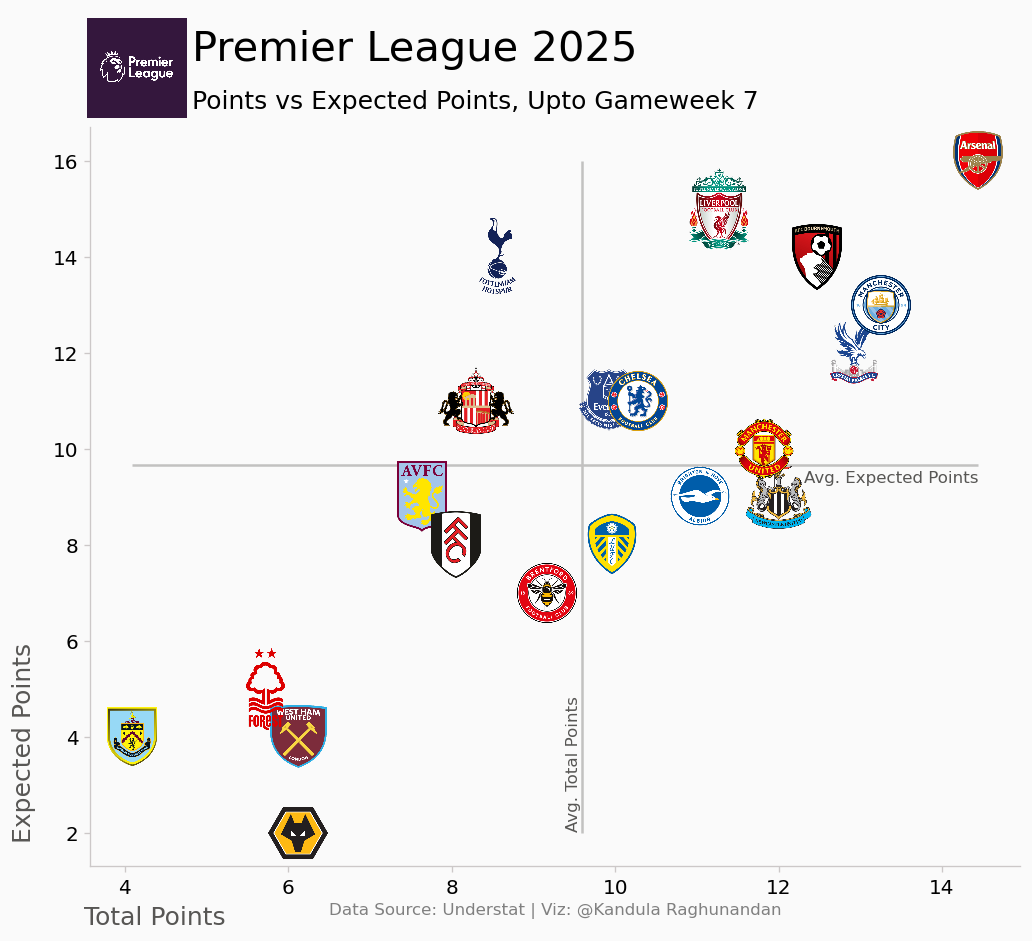

In [35]:
# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['total_xpts'], df['total_pts'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.1, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total_xpts'], row['total_pts']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['total_xpts'].mean(), df['total_xpts'].min(), df['total_xpts'].max(), color='#c2c1c0')
plt.vlines(df['total_pts'].mean(), df['total_pts'].min(), df['total_pts'].max(), color='#c2c1c0')

## Title & comment
fig.text(.21,.95,'Premier League 2025',size=25)
fig.text(.21,.90,'Points vs Expected Points, Upto Gameweek 7', size=15)

## Avg line explanation
fig.text(.06,.14,'Expected Points', size=15, color='#575654',rotation=90)
fig.text(.12,0.05,'Total Points', size=15, color='#575654')

## Axes titles
fig.text(.72,.51,'Avg. Expected Points', size=10, color='#575654')
fig.text(.522,.15,'Avg. Total Points', size=10, color='#575654',rotation=90)

# Adding League Logo
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Prem Logo.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax,league_logo,zoom=0.03, xy=(0.05,1.08))

plt.text(
    0.5, -0.06, "Data Source: Understat | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Prem_Points_2025.png")